# Simple Image Classifier

The

## Importing libraries

Here, we apply the computer vision module (compvis) to load and preprocess the images.

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from compvis.preprocessing import SimplePreprocessor # compvis module
from compvis.datasets import SimpleDatasetLoader
from imutils import paths
import matplotlib.pyplot as plt
import cv2 as cv

## Setting the image paths

In [2]:
dataset = "/home/igor/Documents/Artificial_Inteligence/Datasets/Animals" # image path
imagePaths = list(paths.list_images(dataset)) # creating a list of paths

## Loading images from disk

Fist off all, we are going to load the images from disk with the sub-module datasets and the class SimpleDatasetLoader, for the moment we do not consider any transformation, because we want to visualize the original image for each class.

In [12]:
sdl = SimpleDatasetLoader(preprocessors=None)
(data, labels) = sdl.load(imagePaths, verbose=500)

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


**Visualizing the classes**

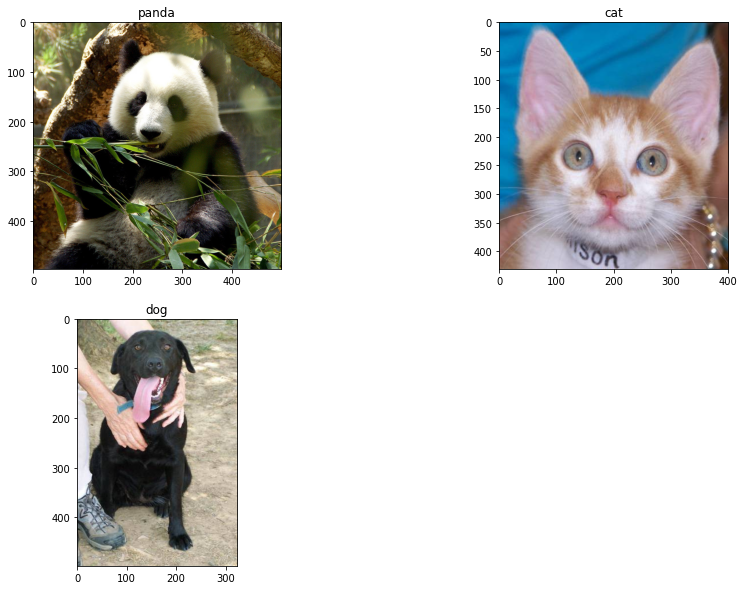

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title("panda")
plt.imshow(cv.cvtColor(data[0], cv.COLOR_BGR2RGB))
plt.subplot(2,2,2)
plt.title("cat")
plt.imshow(cv.cvtColor(data[1000], cv.COLOR_BGR2RGB))
plt.subplot(2,2,3)
plt.title("dog")
plt.imshow(cv.cvtColor(data[-2], cv.COLOR_BGR2RGB))
plt.show()

**loading images from disk and resizing them**

Here, we reload the images from disk, but this time we apply the SimplePreprocessor class, that resizes the images without considering the aspect ratio. We downsize the images to $(32,32)$. The arguments required for the SimplePrepocessor are the new width and height. For the class SimpleDatasetLoader, this time we put the list with preprocessors, in this case the SimplePreprocessor.

In [28]:
sp = SimplePreprocessor(32, 32) # object to resize
sdl = SimpleDatasetLoader(preprocessors=[sp]) # object to load from disk and process
(data, labels) = sdl.load(imagePaths, verbose=500) # function load

[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


We must reshape the data. As we know, images are represented by three color channels, RGB. Each channel is represented by a $32x32$ array, totaling 1024 points, but as we have three channels, the total of points will be $3072$. So, our data set is represented by $3000$ images, each image is considered a data point, totaling $3000$ rows, and $3072$ features columns.

In [29]:
data = data.reshape((data.shape[0], 3072))

In [30]:
print("[INFO] features matrix: {:.1f}MB".format(data.nbytes / (1024 * 1000.0)))

[INFO] features matrix: 9.0MB


## Enconding the labels

In [5]:
le = LabelEncoder()
labels = le.fit_transform(labels)

## Splitting the dataset into training and test set

In [31]:
(X_train, X_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=42)

## Building the classification models with scikit-learn library

In [41]:
# Logistic Regression
params1 = {"C": [0.0001, 0.001, 0.01, 0.1, 1.0]}
model1 = GridSearchCV(LogisticRegression(), params1, cv=5, n_jobs=-1)
model1.fit(X_train, y_train)
print("[INFO] best hyperparameters: {}".format(model1.best_params_))

# KNN
params2 = {"n_neighbors": [1, 5, 10]}
model2 = GridSearchCV(KNeighborsClassifier(), params2, cv=5, n_jobs=-1) 
model2.fit(X_train, y_train)
print("[INFO] best hyperparameters: {}".format(model2.best_params_))

# SVM
params3 = {'C': [0.1, 1, 10, 100], 'gamma': [100, 10, 1, 0.1, 0.01, 0.001], 
           'degree': [2, 4, 6], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
model3 = GridSearchCV(SVC(), params3, cv=5, n_jobs=-1)
#model3.fit(X_train, y_train)
#print("[INFO] best hyperparameters: {}".format(model3.best_params_))


/home/igor/anaconda3/envs/tf_cuda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[INFO] best hyperparameters: {'C': 0.0001}
[INFO] best hyperparameters: {'n_neighbors': 10}


### Predicting on the test set

In [42]:
preds1 = model1.predict(X_test) # for the model 1
preds2 = model2.predict(X_test) # for the model 2
#preds3 = model3.predict(X_test) # for the model 2

In [43]:
print("Logistic Regression")
print(classification_report(y_test, preds1, target_names=le.classes_))
print("KNN")
print(classification_report(y_test, preds2, target_names=le.classes_))
print("SVM")
#print(classification_report(y_test, preds3, target_names=le.classes_))

Logistic Regression
              precision    recall  f1-score   support

         cat       0.51      0.54      0.53       249
         dog       0.46      0.51      0.48       239
       panda       0.76      0.64      0.69       262

    accuracy                           0.57       750
   macro avg       0.58      0.56      0.57       750
weighted avg       0.58      0.57      0.57       750

KNN
              precision    recall  f1-score   support

         cat       0.47      0.70      0.56       249
         dog       0.38      0.44      0.41       239
       panda       0.90      0.35      0.51       262

    accuracy                           0.50       750
   macro avg       0.59      0.50      0.49       750
weighted avg       0.59      0.50      0.50       750

SVM
